#### importing libraries

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from predict_evaluate import model

from removeoutliers import remove_outliers
from plot_confusionmatrix import plot_confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../datasets/vehicles.csv')
# read file

In [3]:
data.head()
# quick overview

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
data.info()
# more info about data lenght and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [5]:
data.describe().T
# quick overview of the data

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
CIRCULARITY,846.0,44.861702,6.169866,33.0,40.00,44.0,49.0,59.0
DISTANCE_CIRCULARITY,846.0,82.088652,15.771533,40.0,70.00,80.0,98.0,112.0
RADIUS_RATIO,846.0,168.940898,33.472183,104.0,141.00,167.0,195.0,333.0
PR.AXIS_ASPECT_RATIO,846.0,61.693853,7.888251,47.0,57.00,61.0,65.0,138.0
MAX.LENGTH_ASPECT_RATIO,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
SCATTER_RATIO,846.0,168.839243,33.244978,112.0,146.25,157.0,198.0,265.0
ELONGATEDNESS,846.0,40.933806,7.811560,26.0,33.00,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,846.0,20.582742,2.592138,17.0,19.00,20.0,23.0,29.0
MAX.LENGTH_RECTANGULARITY,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
data.isnull().sum()
# check for missing values

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [7]:
data.Class.value_counts()
# check value counts

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

In [8]:
data['Class'].unique()
# unquie value

array(['van', 'saab', 'bus', 'opel'], dtype=object)

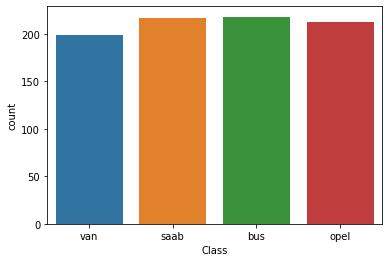

In [9]:
sns.countplot(data.Class)
plt.show()
# coutplot of each of the observations in **Class**

In [10]:
# data.groupby(by='Class').count()

### Checking for outliers and removing them using Interquartile Range Rule

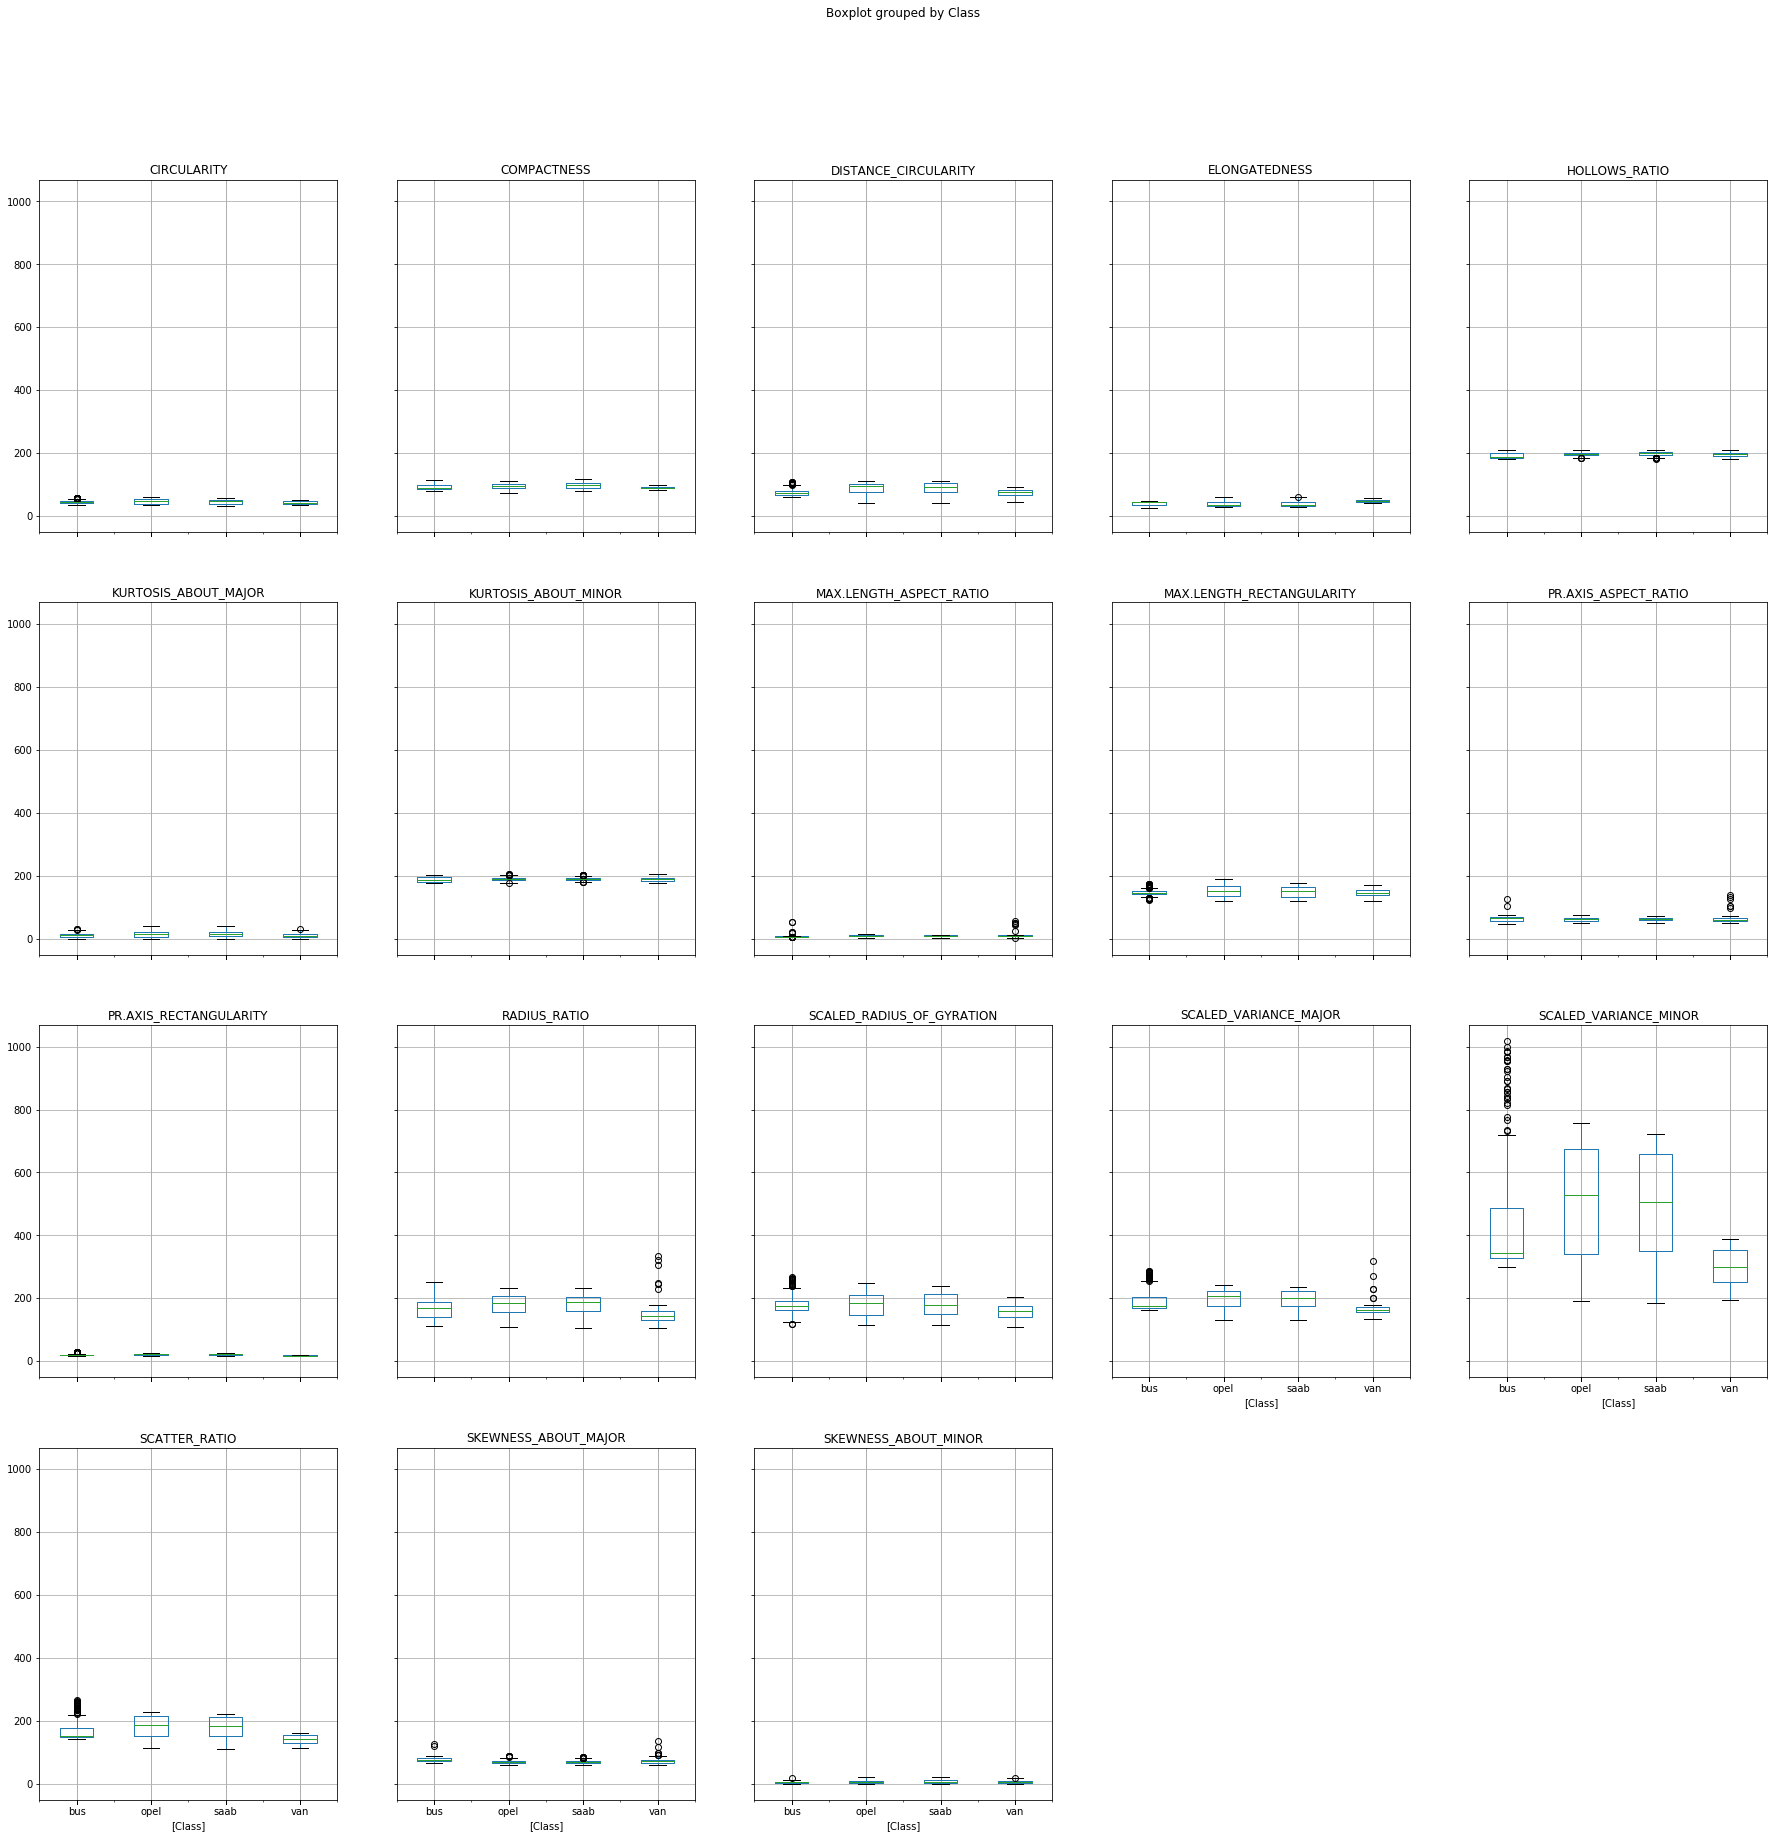

In [11]:
data.boxplot(by='Class', layout=(4,5), figsize=(30, 30))
plt.show()

In [12]:
# extract columns

data_columns = data.columns.values
data_columns

array(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY',
       'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO',
       'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY',
       'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR',
       'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION',
       'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR',
       'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO',
       'Class'], dtype=object)

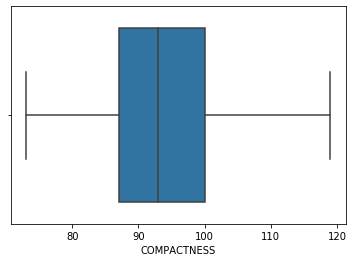

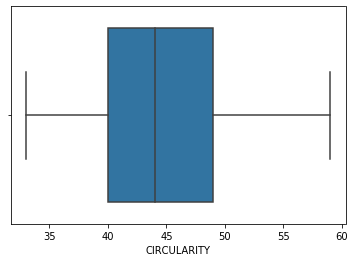

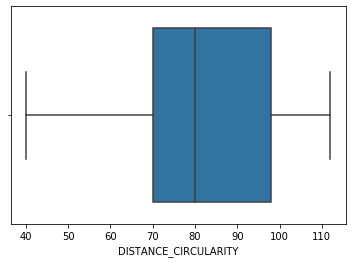

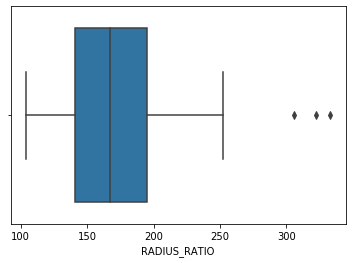

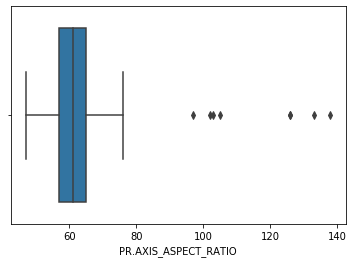

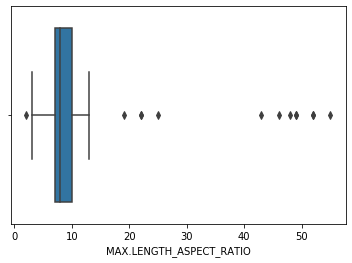

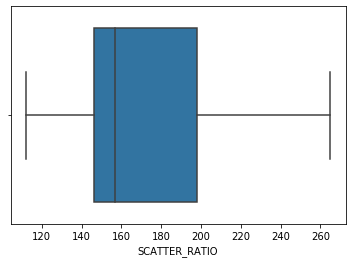

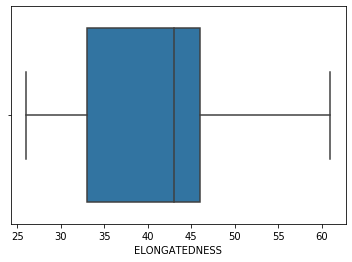

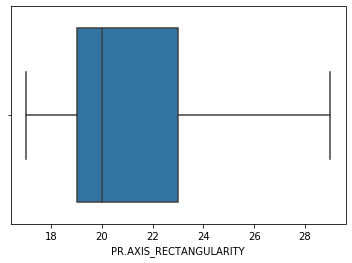

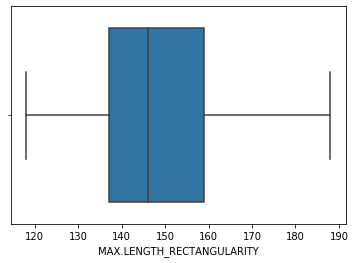

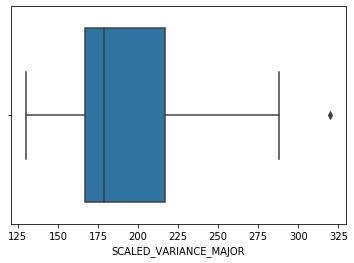

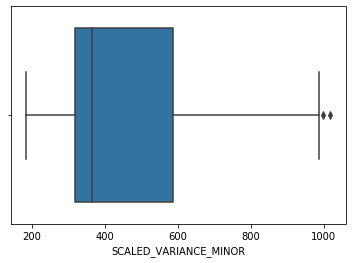

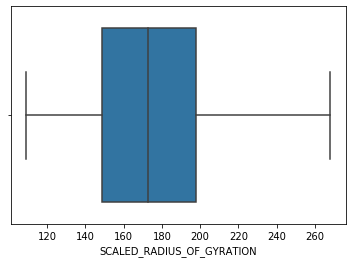

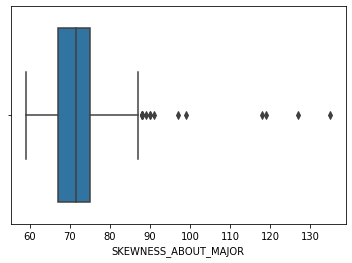

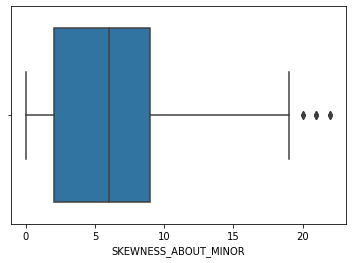

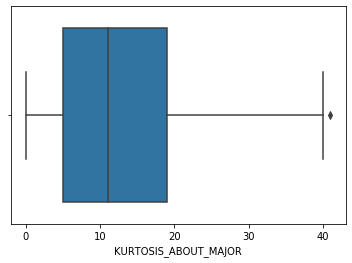

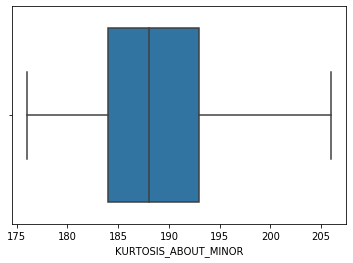

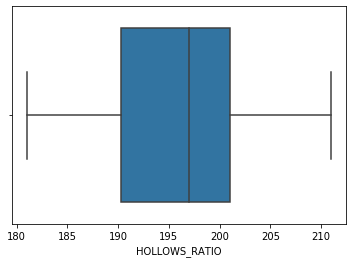

In [13]:
for i, column in enumerate(data_columns[:-1]):
    plt.figure(i)
    sns.boxplot(data[column])
#Checking  Outliers plot



In [14]:
data.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

In [15]:
data_df = data.copy()

In [16]:
data_df = remove_outliers('RADIUS_RATIO', data_df)
data_df = remove_outliers('PR.AXIS_ASPECT_RATIO',data_df)
data_df = remove_outliers('MAX.LENGTH_ASPECT_RATIO',data_df)
data_df = remove_outliers('SCALED_VARIANCE_MAJOR',data_df)
data_df = remove_outliers('SCALED_VARIANCE_MINOR',data_df)
data_df = remove_outliers('SKEWNESS_ABOUT_MAJOR',data_df)
data_df = remove_outliers('SKEWNESS_ABOUT_MINOR',data_df)
data_df = remove_outliers('KURTOSIS_ABOUT_MAJOR',data_df)

# calling remove outliers functon


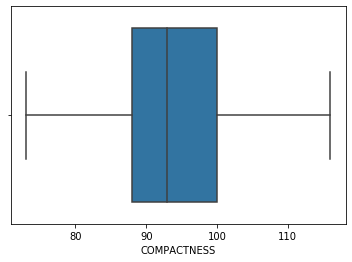

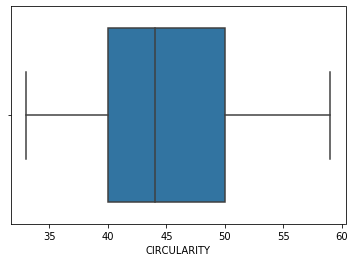

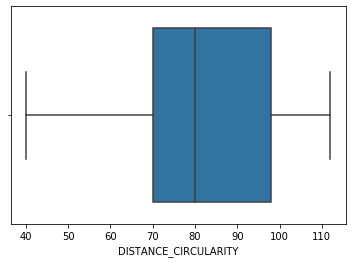

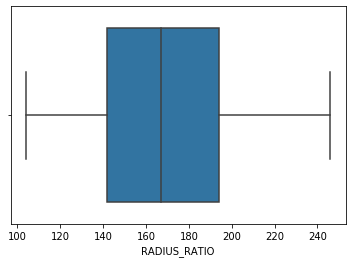

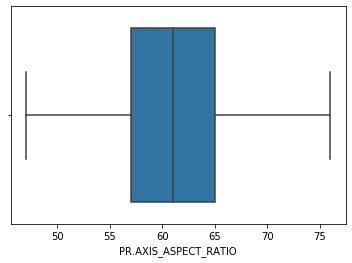

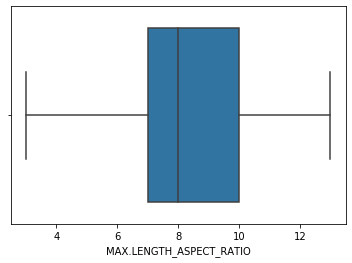

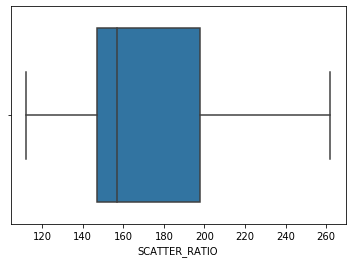

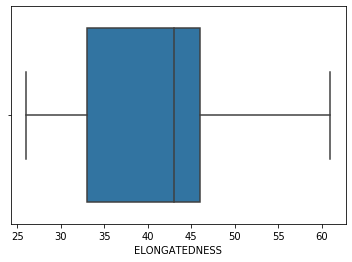

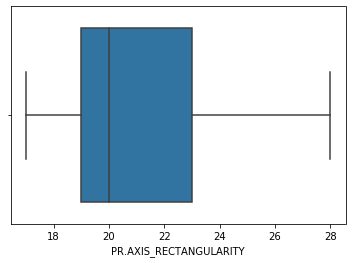

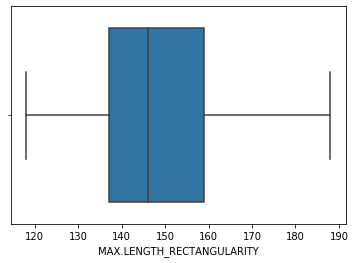

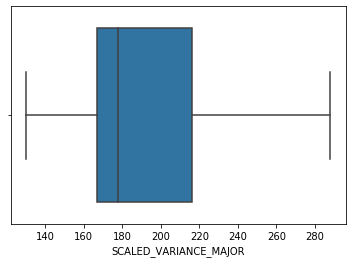

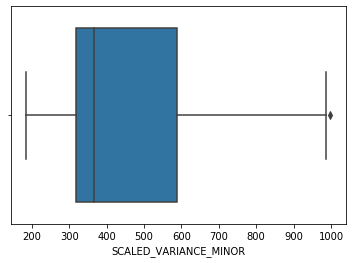

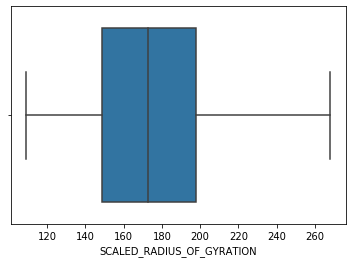

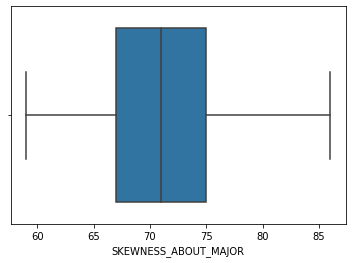

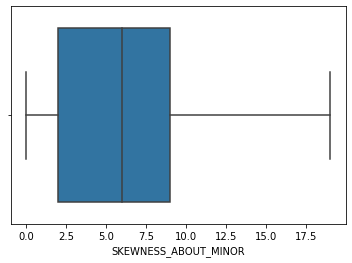

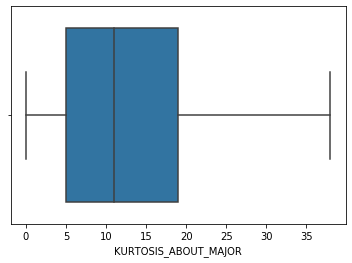

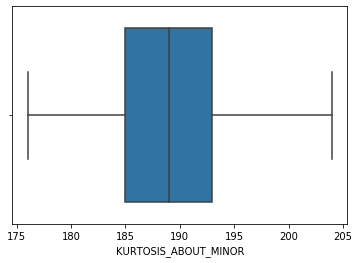

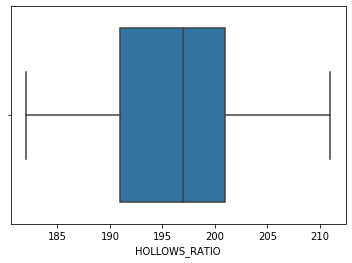

In [17]:
# outlier free data
for i, column in enumerate(data_df.columns.values[:-1]):
    plt.figure(i)
    sns.boxplot(data_df[column])

In [18]:
data.corr()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
COMPACTNESS,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
CIRCULARITY,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
DISTANCE_CIRCULARITY,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
RADIUS_RATIO,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
PR.AXIS_ASPECT_RATIO,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381
MAX.LENGTH_ASPECT_RATIO,0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919
SCATTER_RATIO,0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950
ELONGATEDNESS,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
PR.AXIS_RECTANGULARITY,0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
MAX.LENGTH_RECTANGULARITY,0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


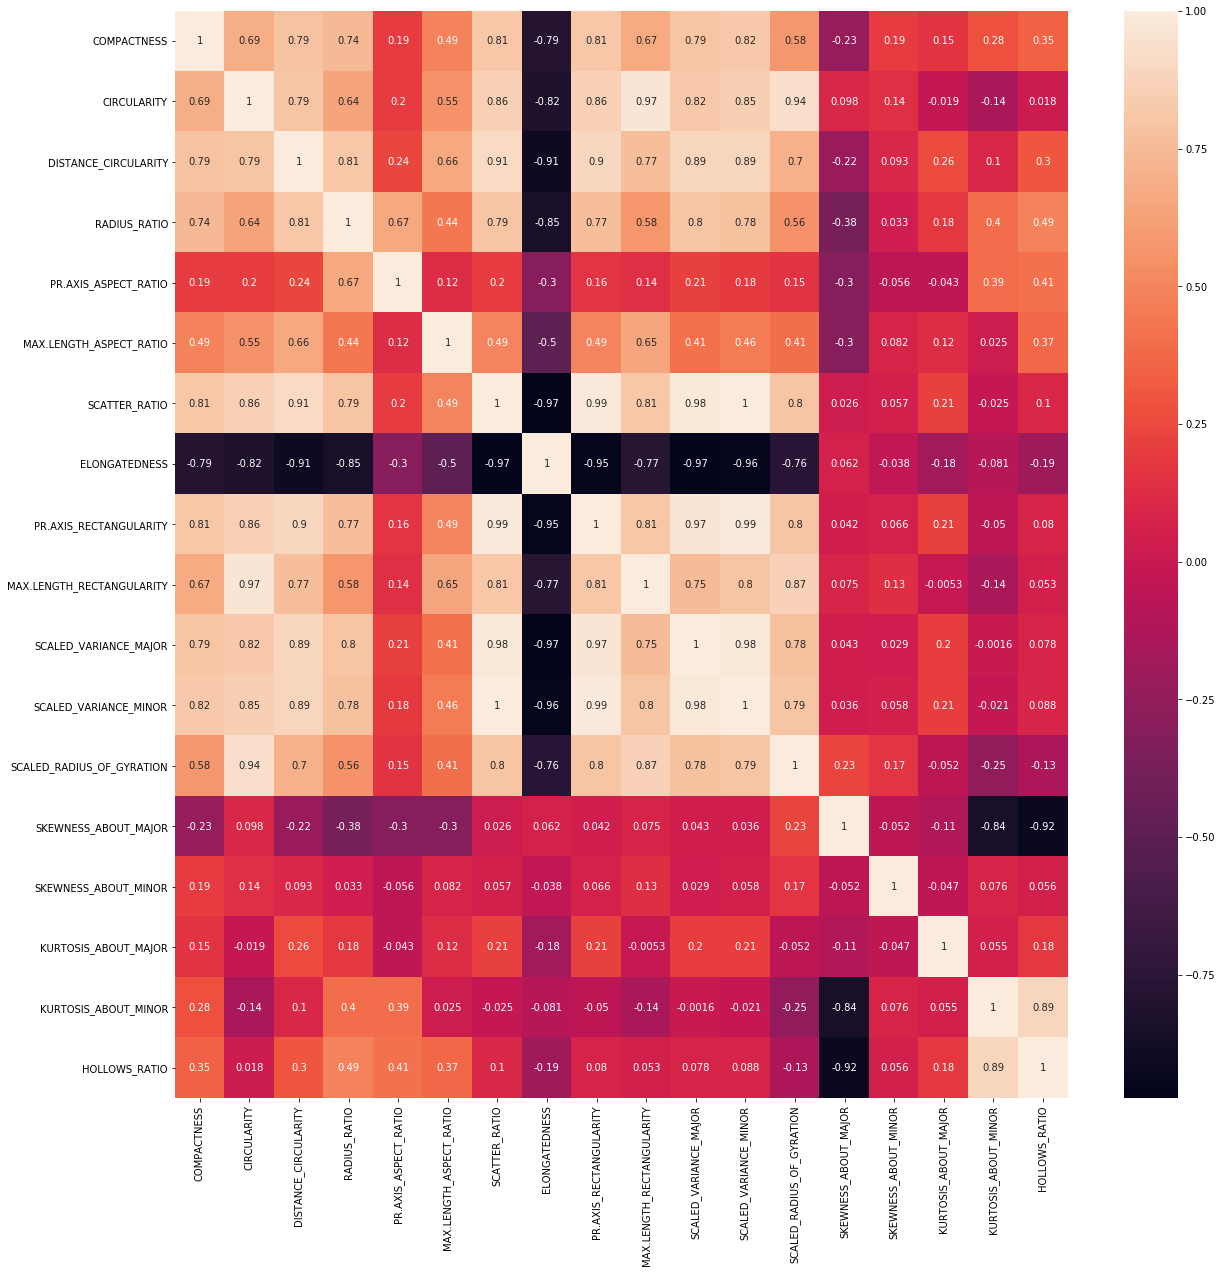

In [19]:
# heatmap for continuous data
data_corr = data_df.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(data_corr, annot=True)
plt.show()

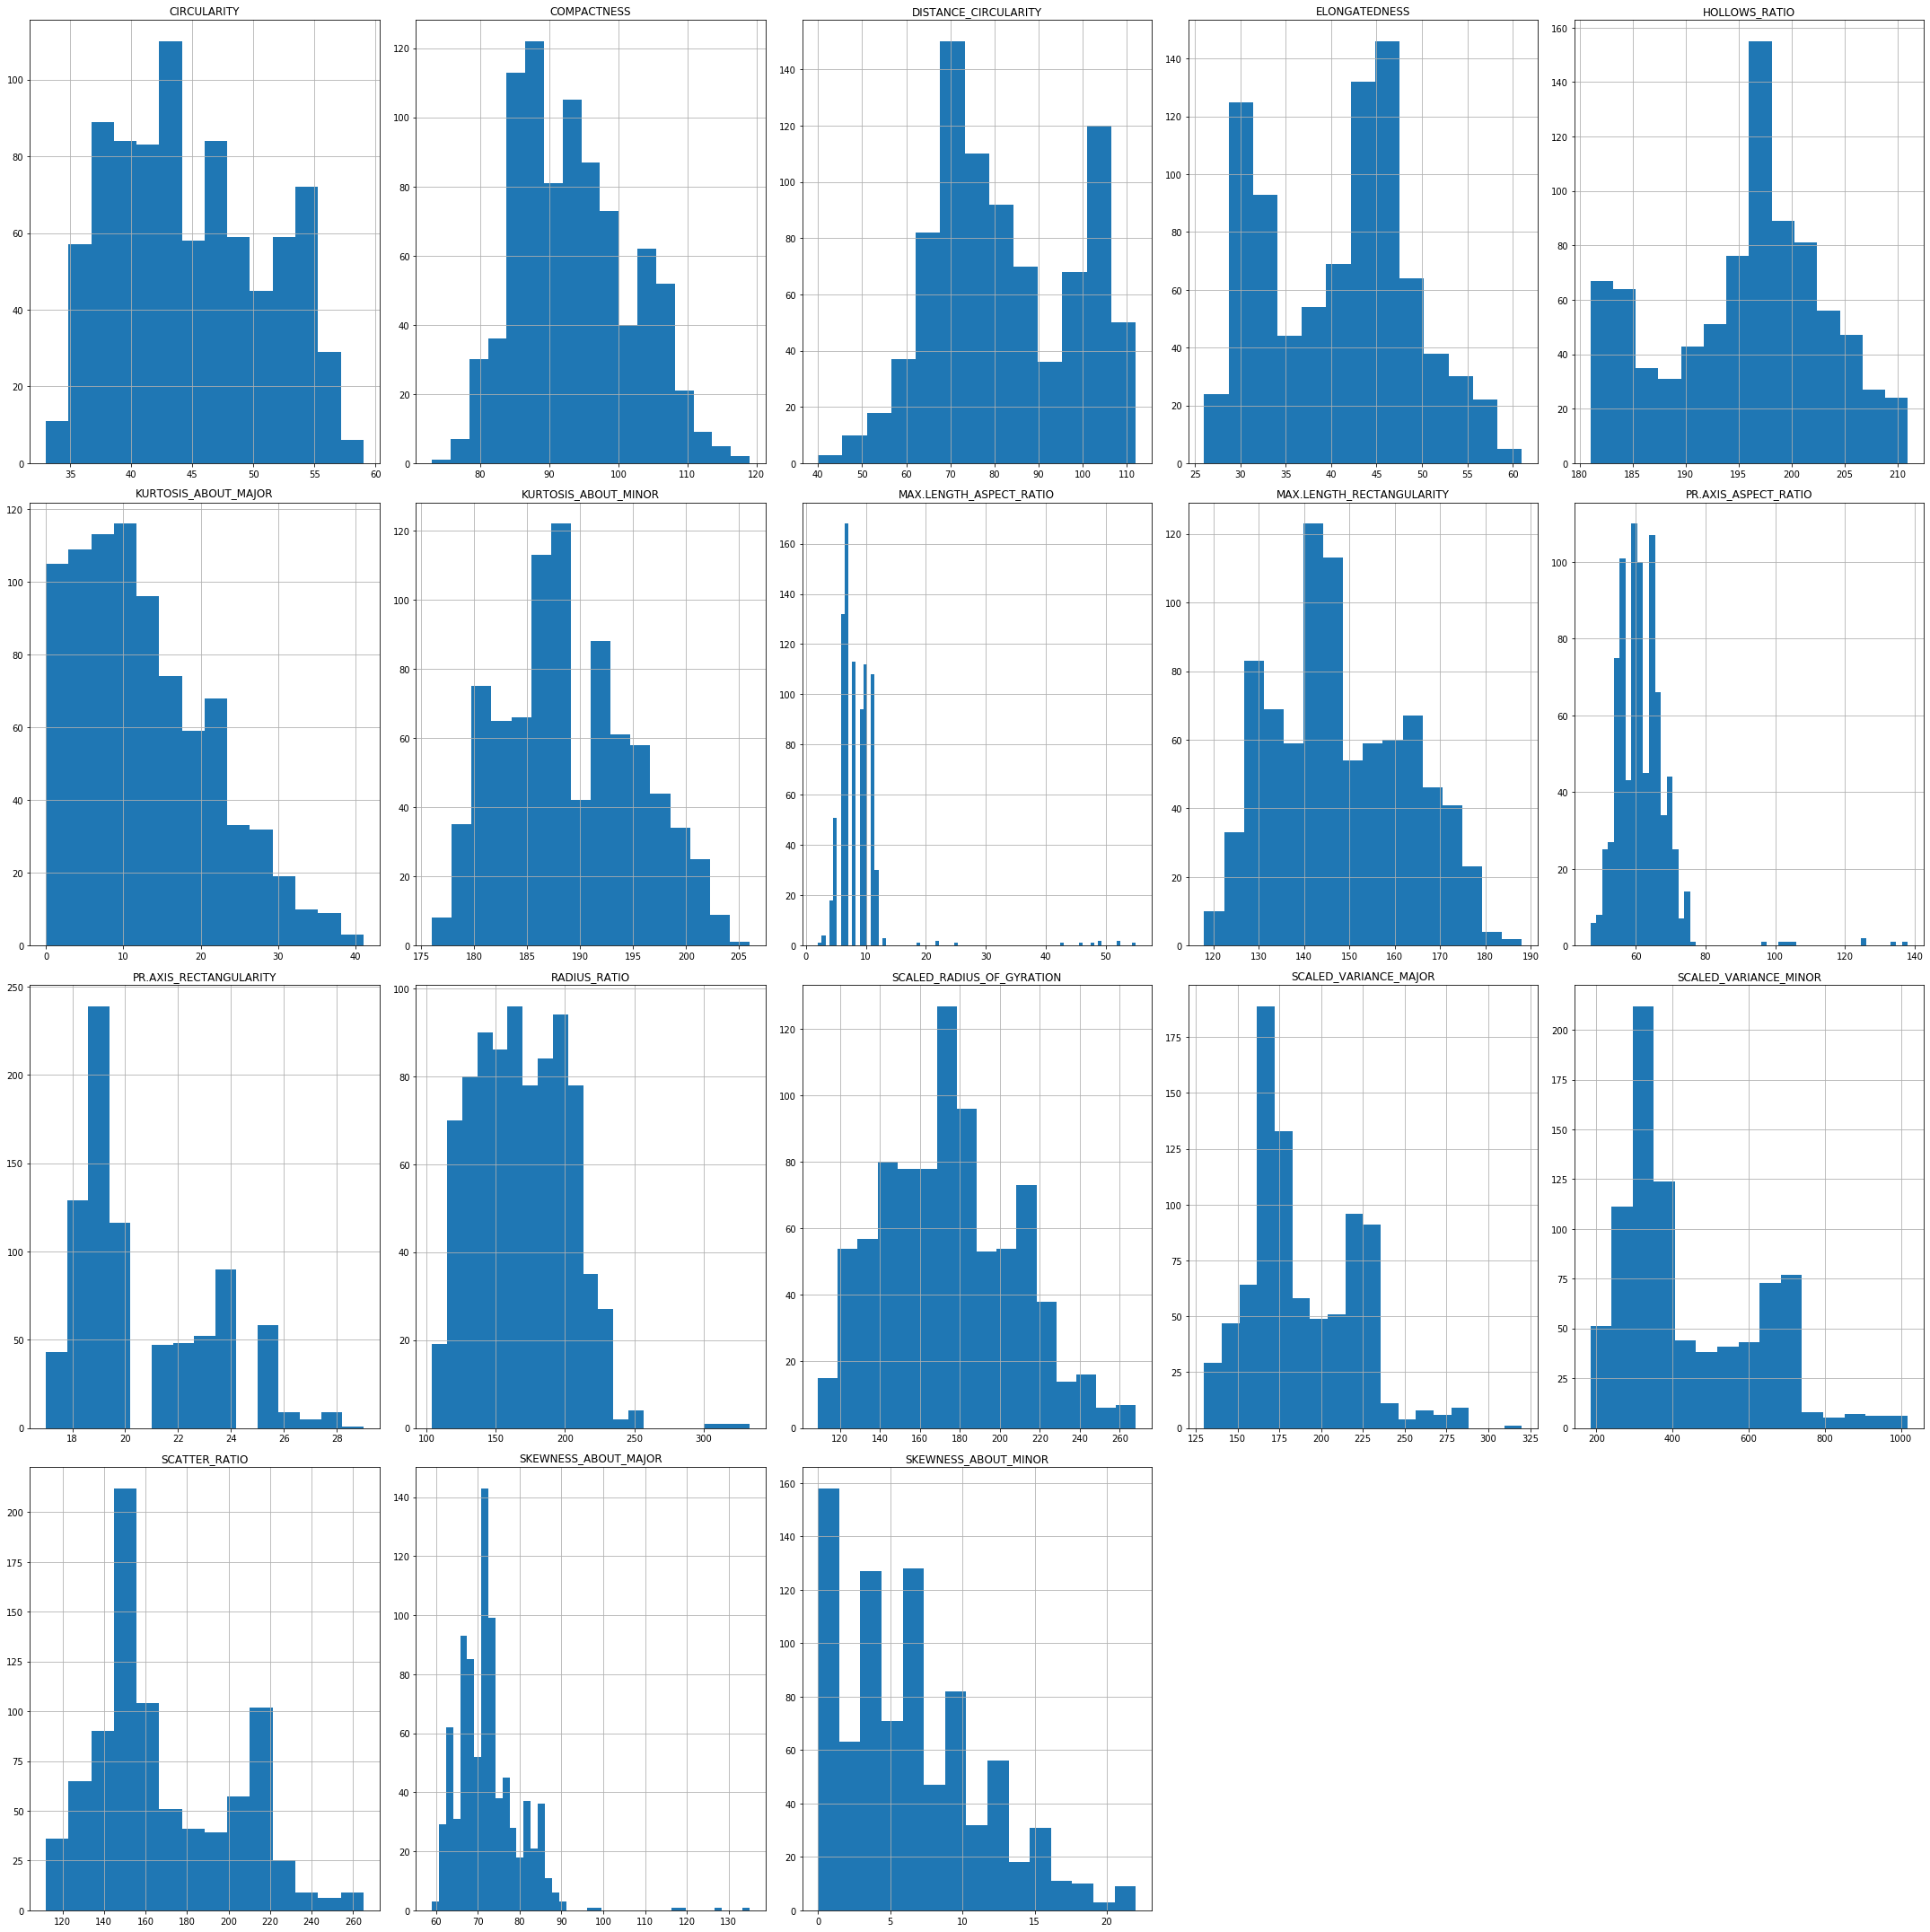

In [20]:
# plot histogram for continous data

data.hist(figsize=(30, 30), layout=(4,5), bins='auto')
plt.tight_layout()
plt.show()

In [21]:
# label encoder
encode = LabelEncoder()
data.Class = encode.fit_transform(data.Class)

In [22]:
X = data.iloc[:, :-1]
y = data.Class

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [24]:
#Scale the data using Standard Scalar

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform (x_test)

LogisticRegression :
               precision    recall  f1-score   support

           0       0.98      0.91      0.95        70
           1       0.57      0.66      0.61        44
           2       0.56      0.56      0.56        41
           3       0.96      0.93      0.95        57

    accuracy                           0.80       212
   macro avg       0.77      0.77      0.77       212
weighted avg       0.81      0.80      0.80       212



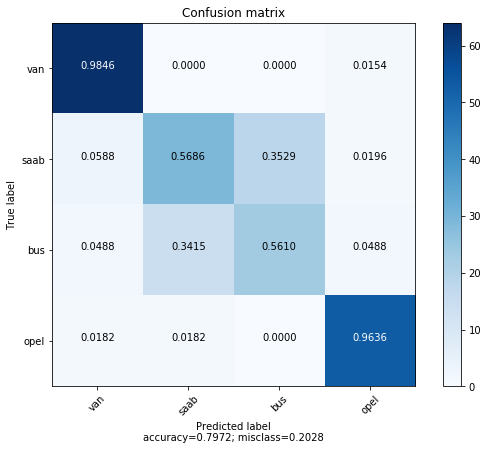

RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.61      0.65      0.63        48
           2       0.56      0.61      0.58        38
           3       1.00      0.92      0.96        60

    accuracy                           0.82       212
   macro avg       0.79      0.78      0.79       212
weighted avg       0.83      0.82      0.82       212



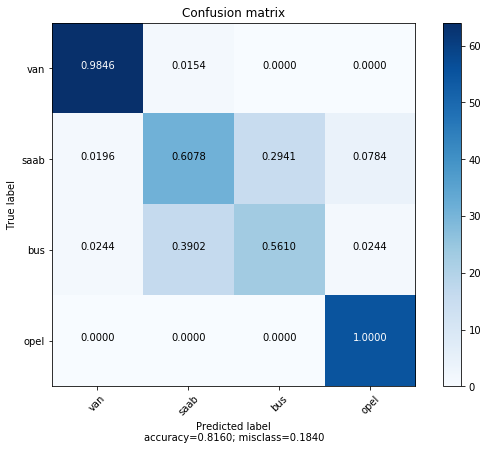

AdaBoostClassifier :
               precision    recall  f1-score   support

           0       0.66      0.96      0.78        45
           1       0.53      0.38      0.44        72
           2       0.39      0.30      0.34        54
           3       0.69      0.93      0.79        41

    accuracy                           0.58       212
   macro avg       0.57      0.64      0.59       212
weighted avg       0.55      0.58      0.55       212



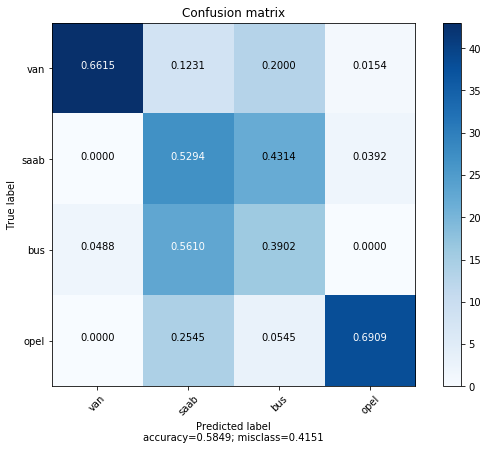

SVC :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.45      0.56      0.50        41
           2       0.54      0.47      0.50        47
           3       1.00      0.92      0.96        60

    accuracy                           0.77       212
   macro avg       0.74      0.73      0.73       212
weighted avg       0.78      0.77      0.77       212



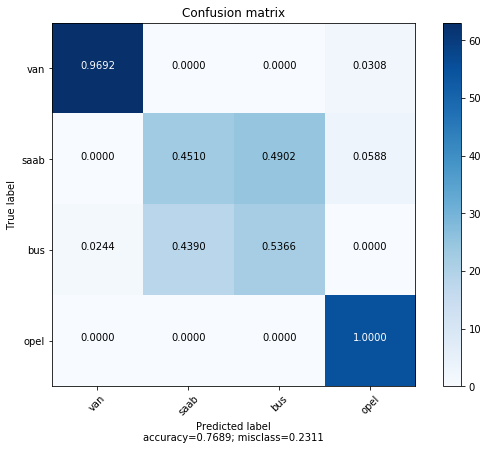

SVC :
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.63      0.70      0.66        46
           2       0.59      0.57      0.58        42
           3       0.98      0.95      0.96        57

    accuracy                           0.82       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.82      0.82      0.82       212



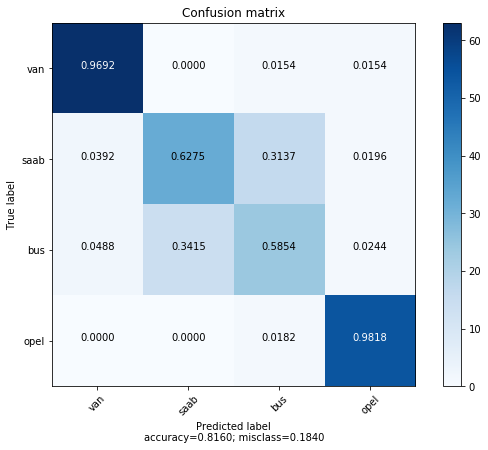

DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        66
           1       0.53      0.64      0.58        42
           2       0.56      0.48      0.52        48
           3       0.89      0.88      0.88        56

    accuracy                           0.75       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.76      0.75      0.76       212



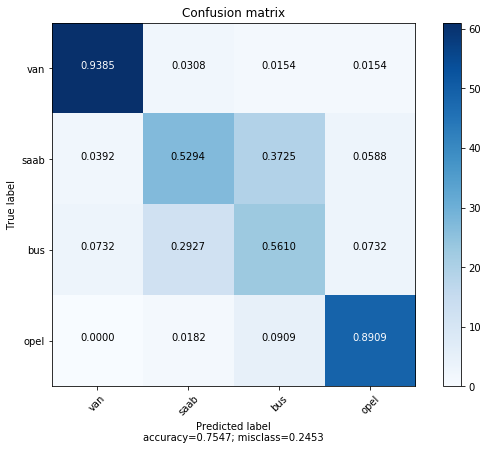

,f1 score,precision,recall_score
Logistic,0.766520,0.769464,0.766044
RandomForest,0.785541,0.788359,0.784365
AdaBoost,0.587338,0.568026,0.638420
SVC RBF,0.733316,0.739199,0.732526
SVC Linear,0.789235,0.790966,0.788687
Decision Tree,0.727920,0.729940,0.730317


In [25]:
model(X_train,y_train,X_test,y_test)